In [93]:
import matplotlib.pyplot as plt # plotting
import numpy as np              # working with number arrays etc.
from netCDF4 import Dataset     # reading netcdf files
from numpy import trapz         # for integration
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [94]:


path_les= "/Users/amrapalli/Desktop/DATA_ADC_paper1/LES/"
path_adc= "/Users/amrapalli/Desktop/DATA_ADC_paper1/ADC/"
path_kpp="/Users/amrapalli/Desktop/DATA_ADC_paper1/KPP-CVMix/"
path_ke="/Users/amrapalli/Desktop/DATA_ADC_paper1/K-EPSILON-SG/"



In [95]:

# density calculation from given temp and salinity
def density_eos(t,s):
    density= 1026.0*(1.0-2e-4*(t-20)+8e-4*(s-35))
    return density


#rate of change of depth integrated potential energy calculation
def pot_energy2(temperature_0,temperature_t,salinity_0,salinity_t,depth,dtdz,dsdz,t=95):
    
     
   # depth=np.append(-0.5,depth)
    temp=20+dtdz*depth
    salt=35+dsdz*depth
    ind=np.where((depth)>=-100)  ##plots are weird with, 5 m doing worse than 10m if whole depth 100m is selected
    salt=salt[ind]
    temp=temp[ind]
    depth=depth[ind]
    density= density_eos(temp,salt)
    # depth integrated potential energy PE=density*9.81*depth
    area=trapz(density*9.81*depth,depth)
    PE_0=area  #/(depth[0]-depth[-1])

    
    #for final time
    #temp=temperature_t
    #salt=salinity_t

    temp=temperature_t[ind]
    salt=salinity_t[ind]
    density= density_eos(temp,salt)
    #plt.plot(density,depth)
    # depth integrated potential energy PE=density*9.81*depth
    # area under PE
    area=trapz(density*9.81*depth,depth)
    PE_t=area  #/(depth[0]-depth[-1])
    PE_rate_change=(PE_t-PE_0)/(3600*t)  # in Watt/m^2
    #print(PE_t)
   # plt.plot(density,depth)

    return (PE_rate_change)
# density calculation from given temp and salinity
def density_eos(t,s):
    alpha=2e-4; beta=8e-4; g=9.81; rho=1026.0
    density= rho*(1.0-alpha*(t-20)+beta*(s-35))
    return density


#rate of change of depth integrated potential energy calculation
def pot_energy2_10monly(temperature_0,temperature_t,salinity_0,salinity_t,depth,dtdz,dsdz,t=95):
    
     
    depth=np.append(-0.5,depth)
    temp=20+dtdz*depth
    salt=35+dsdz*depth
    ind=np.where((depth)>=-100)  ##plots are weird with, 5 m doing worse than 10m if whole depth 100m is selected
    salt=salt[ind]
    temp=temp[ind]
    depth=depth[ind]
    density= density_eos(temp,salt)
    plt.plot(density,depth,'-')
    # depth integrated potential energy PE=density*9.81*depth
    area=trapz(density*9.81*depth,depth)
    PE_0=area  #/(depth[0]-depth[-1])

    
    #for final time
    #temp=temperature_t
    #salt=salinity_t
    temperature_t=np.append(temperature_t[0],temperature_t)
    salinity_t=np.append(salinity_t[0],salinity_t)
    temp=temperature_t[ind]
    salt=salinity_t[ind]
    density= density_eos(temp,salt)
    #plt.plot(density,depth)
    # depth integrated potential energy PE=density*9.81*depth
    # area under PE
    area=trapz(density*9.81*depth,depth)
    PE_t=area  #/(depth[0]-depth[-1])
    PE_rate_change=(PE_t-PE_0)/(3600*t)  # in Watt/m^2
    #print(PE_t)
   # plt.plot(density,depth,'--')

    return (PE_rate_change)


In [96]:
# time step
t = 95  # as KPP and KE have 95 hrs of data stratibg from zero
# range of time for averaging
t1 = t-24

results_les = {}
les= Dataset(path_les+'Cooling2.nc', mode='r')
results_les["pe_c2_les"] = pot_energy2(les.variables["temp"][0,:],
                                              np.nanmean(les.variables["temp"][t1:t,:],axis=0),
                                              les.variables["salt"][0,:],
                                              np.nanmean(les.variables["salt"][t1:t,:],axis=0),
                                              les.variables['zm'][:],
                                              dtdz=0.1,
                                              dsdz=0.0)
results_les


# ADC
results_adc_c2_adcdt = {}
file_names_adcdt = ["p5s","1s","2s","5s"]

for fn in file_names_adcdt:  
        mf = Dataset(path_adc+f'adcTurbulenceArrays_c2_1m_adcdt{fn}_dt1hr.nc', mode='r')  
        fh = Dataset(path_adc+'output.0001-01-01_00.00_c2_1m_adcdt1s_dt1hr.nc', mode='r')
        dtdz=0.1; dsdz=0.0 #for c2
       
                         
        # compute pot
        results_adc_c2_adcdt[f"pe_c2_adcdt{fn}"] = pot_energy2(mf.variables["temperature"][0,0,:],
                                                   np.nanmean(mf.variables["temperature"][t1:t,0,:],axis=0),
                                                   mf.variables["salinity"][0,0,:],
                                                  np.nanmean(mf.variables["salinity"][t1:t,0,:],axis=0),
                                                  fh.variables['zMid'][0,0,:],
                                                  dtdz,
                                                  dsdz)
#print(results_adc_c2_adcdt)

print(results_les["pe_c2_les"] )

0.00016223437951235045


In [97]:
results_adc_c2_adcdt

{'pe_c2_adcdtp5s': 0.00013796321333151812,
 'pe_c2_adcdt1s': 0.00014243694131224477,
 'pe_c2_adcdt2s': 0.0001477505181485798,
 'pe_c2_adcdt5s': 0.00014366383789575588}

In [120]:
relative_errors_adcdt = {}

file_names_adcdt = ["p5s","1s","2s","5s"]
for fn in file_names_adcdt:
    numerator =  results_adc_c2_adcdt[f"pe_c2_adcdt{fn}"]-results_les["pe_c2_les"] 
    relative_errors_adcdt[f"c2_adcdt{fn}"] = numerator/results_les["pe_c2_les"]
        



Text(8, -0.75, '(a)')

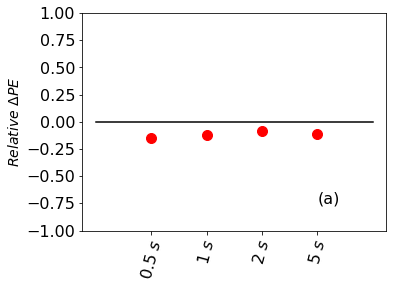

In [99]:

 
plt.figure(figsize=(12,4))
plt.subplot(121)

a=2,4,6,8
plt.plot(a[0],relative_errors_adcdt["c2_adcdtp5s"],'or',markersize=10)
plt.plot(a[1],relative_errors_adcdt["c2_adcdt1s"],'or',markersize=10)
plt.plot(a[2],relative_errors_adcdt["c2_adcdt2s"],'or',markersize=10)
plt.plot(a[3],relative_errors_adcdt["c2_adcdt5s"],'or',markersize=10)

#plt.plot(a[0],c4_adcp5s,'ok',markersize=10)
#plt.plot(a[1],c4_adc1s,'ok',markersize=10)
#plt.plot(a[2],c4_adc2s,'ok',markersize=10)
#plt.plot(a[3],c4_adc5s,'ok',markersize=10)

plt.ylim(-1,1)


plt.plot([0,10],[0,0],'-k')
plt.xticks([2,4,6,8], ['$0.5$ $s$', '$1$ $s$', '$2$ $s$','$5$ $s$'],rotation=75,fontsize=14)
plt.ylabel("$Relative$ $\Delta PE$",fontsize=14)
#plt.xlabel("$Test$ $cases$",fontsize=14)#plt.legend(["1m","2m","5m","10m"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(8,-0.75,"(a)",fontsize=16)



# plt.subplot(122)

# a=2,4,6,8
# plt.plot(a[0],relative_errors_adcdt_10["c2_adcdtp5s"],'or',markersize=10)
# plt.plot(a[1],relative_errors_adcdt_10["c2_adcdt1s"],'or',markersize=10)
# plt.plot(a[2],relative_errors_adcdt_10["c2_adcdt2s"],'or',markersize=10)
# plt.plot(a[3],relative_errors_adcdt_10["c2_adcdt5s"],'or',markersize=10)

# #plt.plot(a[0],c4_adcp5s,'ok',markersize=10)
# #plt.plot(a[1],c4_adc1s,'ok',markersize=10)
# #plt.plot(a[2],c4_adc2s,'ok',markersize=10)
# #plt.plot(a[3],c4_adc5s,'ok',markersize=10)

# plt.ylim(-1,1)

# plt.plot([0,10],[0,0],'-k')
# plt.xticks([2,4,6,8], ['$0.5$ $s$', '$1$ $s$', '$2$ $s$','$5$ $s$'],rotation=75,fontsize=14)
# #plt.ylabel("$Relative$ $\Delta PE$",fontsize=14)
# #plt.xlabel("$Test$ $cases$",fontsize=14)#plt.legend(["1m","2m","5m","10m"])
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.text(8,-0.75,"(b)",fontsize=16)
 
 
 
 

Text(8, -0.75, '(a)')

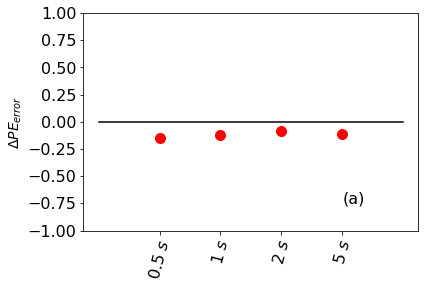

In [104]:

# # ADC
# results_adc_c2_dt = {}

# #path_adc="/Users/amrapallig/run/cvmix_test/forward/output/convection/test_corrected_code/"


# file_names_dt = ["5min","10min","30min","1hr","2hr"]
# for fn in file_names_dt:  
#         mf = Dataset(path_adc+f'adcTurbulenceArrays_c2_1m_adcdt1s_dt{fn}.nc', mode='r')  
#         fh = Dataset(path_adc+f'output.0001-01-01_00.00_c2_1m_adcdt1s_dt{fn}.nc', mode='r')
#         dtdz=0.1; dsdz=0.0 #for c2
        
#         if fn=="1hr":
#             t=96; t1=t-4                 #1hr
#         if fn=="2hr":
#             t=int(96/2); t1=t-int(4/2)   #2hr
#         if fn=="30min":
#             t=int(96*2); t1=t-int(4*2)   #30min
#         if fn=="10min":
#             t=int(96*6); t1=t-int(4*6)   #10min
#         if fn=="5min":
#             t=int(96*12); t1=t-int(4*12)  #5minmin
        
#         # compute pot
#         results_adc_c2_dt[f"pe_c2_dt{fn}"] = pot_energy2_10monly(mf.variables["temperature"][0,0,:],
#                                                    np.nanmean(mf.variables["temperature"][t1:t,0,:],axis=0),
#                                                    mf.variables["salinity"][0,0,:],
#                                                   np.nanmean(mf.variables["salinity"][t1:t,0,:],axis=0),
#                                                   fh.variables['zMid'][0,0,:],
#                                                   dtdz,
#                                                   dsdz)
# results_adc_c2_dt
# relative_errors_dt = {}

# file_names_dt = ["5min","10min","30min","1hr","2hr"]
# for fn in file_names_dt:
#     numerator = results_adc_c2_dt[f"pe_c2_dt{fn}"]-results_les["pe_c2_les"] 
#     relative_errors_dt[f"c2_dt{fn}"] = numerator/results_les["pe_c2_les"]
    
    
        
# relative_errors_dt
# relative_errors_dt


plt.figure(figsize=(6,4))
#plt.subplot(121)

a=2,4,6,8
plt.plot(a[0],relative_errors_adcdt["c2_adcdtp5s"],'or',markersize=10)
plt.plot(a[1],relative_errors_adcdt["c2_adcdt1s"],'or',markersize=10)
plt.plot(a[2],relative_errors_adcdt["c2_adcdt2s"],'or',markersize=10)
plt.plot(a[3],relative_errors_adcdt["c2_adcdt5s"],'or',markersize=10)

#plt.plot(a[0],c4_adcp5s,'ok',markersize=10)
#plt.plot(a[1],c4_adc1s,'ok',markersize=10)
#plt.plot(a[2],c4_adc2s,'ok',markersize=10)
#plt.plot(a[3],c4_adc5s,'ok',markersize=10)

plt.ylim(-1,1)

plt.plot([0,10],[0,0],'-k')
plt.xticks([2,4,6,8], ['$0.5$ $s$', '$1$ $s$', '$2$ $s$','$5$ $s$'],rotation=75,fontsize=14)
plt.ylabel("$\Delta PE_{error}$",fontsize=14)
#plt.xlabel("$Test$ $cases$",fontsize=14)#plt.legend(["1m","2m","5m","10m"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(8,-0.75,"(a)",fontsize=16)

# plt.subplot(122)

# a=2,4,6,8,10
# plt.plot(a[1],relative_errors_dt["c2_dt10min"],'or',markersize=10)
# plt.plot(a[2],relative_errors_dt["c2_dt30min"],'or',markersize=10)
# plt.plot(a[3],relative_errors_dt["c2_dt1hr"],'or',markersize=10)
# plt.plot(a[4],relative_errors_dt["c2_dt2hr"],'or',markersize=10)
# plt.plot(a[0],relative_errors_dt["c2_dt5min"],'or',markersize=10)


# plt.ylim(-1,1)

# plt.plot([0,12],[0,0],'-k')
# plt.xticks([2,4,6,8,10], ['dt\n5min','dt\n10min', 'dt\n30min', 'dt\n1hr','dt\n2hr'],rotation=75,fontsize=14)
# #plt.ylabel("$Relative$ $\Delta PE$",fontsize=14)
# #
# #plt.xlabel("$Test$ $cases$",fontsize=14)#plt.legend(["1m","2m","5m","10m"])
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.text(10,-0.75,"(b)",fontsize=16)
#results_les_maxN2 = {}
#les= Dataset(path_les+'Cooling2.nc', mode='r')
#results_les["pe_c2_les"] = bld_max_N2(les.variables["temp"][:,:],les.variables['zm'][:])

#plt.plot(results_les["pe_c2_les"])
 
######## alternative calculation
 
#def bld_max_N2(temp,z,t):
#     N2=np.gradient(temp[:-2,:],z,axis=1)
#     bld=np.zeros(len(N2[:,0]))
#     for i in np.arange(len(N2[:,0])):    
#         indx=N2[i,:].argmax()
#         bld[i]=z[indx]
#     time=t[:-2]   
#     return (bld,time) 
# les= Dataset(path_les+'Cooling2.nc', mode='r')
#osbl_c2_les,osbl_c2_les_time=bld_max_N2(les.variables["temp"][:,:],
#                                        les.variables['zm'][:],
#                                        les.variables['Time'][:])
#plt.plot(osbl_c2_les_time,osbl_c2_les)


In [101]:
def bld_max_N2(temp,z):  #for timeseries
    N2=np.gradient(temp[:-1,:],z,axis=1)
    bld=np.zeros(len(N2[:,0]))
    for i in np.arange(len(N2[:,0])):    
        indx=N2[i,:].argmax()
        bld[i]=z[indx]
   
    return (bld) 
def bld_max_N2_2(temp,z):  #for particular time
    N2=np.gradient(temp,z)
    indx=N2.argmax()
    bld=z[indx]
    return (bld) 




In [114]:
osbl_les = {}
osbl_les_timeseries = {}
# osbl_dt = {}
# osbl_adcdt_timeseries = {}
# osbl_dt_timeseries = {}

t=95; t1=t-2


les= Dataset(path_les+'Cooling2.nc', mode='r')
osbl_les_timeseries["osbl_c2"]=bld_max_N2(les.variables["temp"][:,:],
                                        les.variables['zm'][:])
osbl_les["osbl_c2"]=bld_max_N2_2(np.nanmean(les.variables["temp"][t1:t,:],axis=0),
                                        les.variables['zm'][:])



In [115]:
                             
file_names_adcdt = ["p5s","1s","2s","5s"]
# file_names_dt = ["5min","10min","30min","1hr","2hr"]


osbl_adcdt_timeseries = {}
osbl_adcdt_1m = {}

for fn in file_names_adcdt:  
    mf = Dataset(path_adc+f'adcTurbulenceArrays_c2_1m_adcdt{fn}_dt1hr.nc', mode='r')  
    fh = Dataset(path_adc+'output.0001-01-01_00.00_c2_1m_adcdt1s_dt1hr.nc', mode='r')
    osbl_adcdt_timeseries[f"osbl_c2_adcdt_{fn}"] = bld_max_N2(mf.variables["temperature"][:,0,:],
                                fh.variables['zMid'][0,0,:],)
        
    osbl_adcdt_1m[f"osbl_c2_adcdt_{fn}"] = bld_max_N2_2(np.nanmean(mf.variables["temperature"][t1:t,0,:],axis=0),
                                            fh.variables['zMid'][0,0,:])

        

  
    


for fn in file_names_adcdt:
    numerator =  osbl_adcdt_1m[f"osbl_c2_adcdt_{fn}"]-osbl_les["osbl_c2"]
    relative_errors_adcdt_1m[f"c2_adcdt{fn}"] = (numerator/osbl_les["osbl_c2"])

     


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


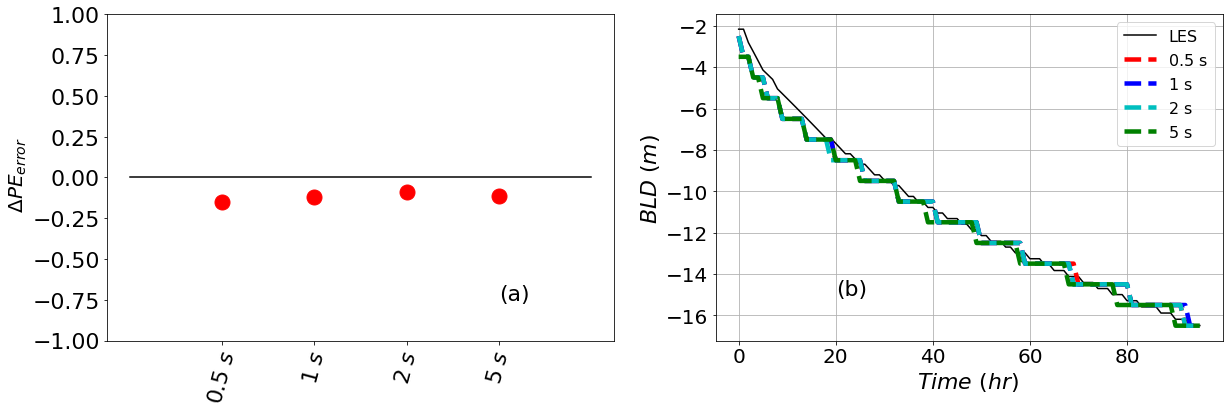

In [130]:
plt.figure(figsize=(20,6))
plt.subplot(121)



a=2,4,6,8
plt.plot(a[0],relative_errors_adcdt["c2_adcdtp5s"],'or',markersize=15)
plt.plot(a[1],relative_errors_adcdt["c2_adcdt1s"],'or',markersize=15)
plt.plot(a[2],relative_errors_adcdt["c2_adcdt2s"],'or',markersize=15)
plt.plot(a[3],relative_errors_adcdt["c2_adcdt5s"],'or',markersize=15)

#plt.plot(a[0],c4_adcp5s,'ok',markersize=10)
#plt.plot(a[1],c4_adc1s,'ok',markersize=10)
#plt.plot(a[2],c4_adc2s,'ok',markersize=10)
#plt.plot(a[3],c4_adc5s,'ok',markersize=10)

plt.ylim(-1,1)


plt.plot([0,10],[0,0],'-k')
plt.xticks([2,4,6,8], ['$0.5$ $s$', '$1$ $s$', '$2$ $s$','$5$ $s$'],rotation=75,fontsize=16)
plt.ylabel(" $\Delta PE_{error}$",fontsize=20)
#plt.xlabel("$Test$ $cases$",fontsize=14)#plt.legend(["1m","2m","5m","10m"])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.text(8,-0.75,"(a)",fontsize=22)

#fig, (ax) = plt.subplots(1, 2, figsize=[6, 4])
#axins = inset_axes(ax, width=1.3, height=0.9)

plt.subplot(122)


plt.plot(osbl_les_timeseries["osbl_c2"][:96],'k',linewidth=1.5)
plt.plot(osbl_adcdt_timeseries["osbl_c2_adcdt_p5s"][:96],'--r',linewidth=4.5)
plt.plot(osbl_adcdt_timeseries["osbl_c2_adcdt_1s"][:96],'--b',linewidth=4.5)
plt.plot(osbl_adcdt_timeseries["osbl_c2_adcdt_2s"][:96],'--c',linewidth=4.5)
plt.plot(osbl_adcdt_timeseries["osbl_c2_adcdt_5s"][:96],'--g',linewidth=4.5)

#plt.xlabel('$Time$ $(hrs)$',fontsize=14)
#plt.ylabel('$BLD$ $(m)$  $@ max(N^2)$',fontsize=14)
plt.grid() 
plt.legend(["LES","$0.5$ s","$1$ s","$2$ s","$5$ s"], fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('$BLD$ $(m)$ ',fontsize=22)
plt.xlabel('$Time$ $(hr)$ ',fontsize=22)
plt.text(20,-15,"(b)",fontsize=22)

 
plt.savefig("c2_time_sens_D3.eps")
